# nlp入门新闻类别分类学习赛

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load data
data_path = r'E:\DataSet\Tianchi\nlpNews\train_set\train_set.csv'
# data = pd.read_csv(data_path, sep='\t')
data = pd.read_csv(data_path, sep='\t', nrows=1000) # 数据探索阶段没必要加载全部的数据

In [7]:
data.head(5)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


###  数据整体情况描述

Text(0.5, 0, 'category')

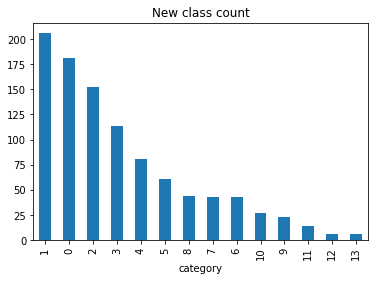

In [11]:
# 1、label整体分布
data['label'].value_counts().plot(kind='bar')
plt.title('New class count')
plt.xlabel('category')
# ：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, 
# '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
# 股票、科技，体育类的新闻最多，星座类的最少

Text(0.5, 0, 'Histogram of char count')

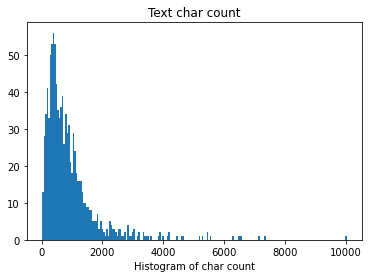

In [15]:
# 每条数据字段长度
data['strLength'] = data['text'].apply(lambda x: len(x.split(' ')))
plt.hist(data['strLength'], bins=200)
plt.title('Text char count')
plt.xlabel('Histogram of char count')
# 绝大部分都是分布在2000字符串长度内

In [17]:
# 字符分布统计
from collections import Counter

all_char = ' '.join(data['text'])
word_count = Counter(all_char.split(' '))
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print(len(word_count))
print(word_count[0])
print(word_count[-1])
# 3969
# ('3750', 37255)
# ('5556', 1)
# 总计3969个字符，出现次数最多的是37255号字符，总计出现37255次（1000条数据的基础上），最少的出现一次。
# 在1000条数据中出现327255次，说明这是停用字，多半是“的”或者是标点符号

3969
('3750', 37255)
('5556', 1)


In [21]:
# 字符覆盖度
from collections import Counter
data['text_unique'] = data['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))  # 先处理每条数据包含的字符
all_lines = ' '.join(list(data['text_unique'])) # 将所有的数据全部拼接起来
word_count = Counter(all_lines.split(' '))
word_count = sorted(word_count.items(), key=lambda x: int(x[1]), reverse=True)
print(word_count[0])
print(word_count[1])
print(word_count[1])
# ('900', 995)
# ('3750', 993)
# ('3750', 993)
# 以900号字符为例，在1000条数据中，有995条数据都包含995号字符，基本可以判断这是标点符号

('900', 995)
('3750', 993)
('3750', 993)


### 数据分析的结论


通过上述分析我们可以得出以下结论：
- 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
- 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
- 赛题总共包括7000-8000个字符；

通过数据分析，我们还可以得出以下结论：

- 每个新闻平均字符个数较多，可能需要截断；
- 由于类别不均衡，会严重影响模型的精度；